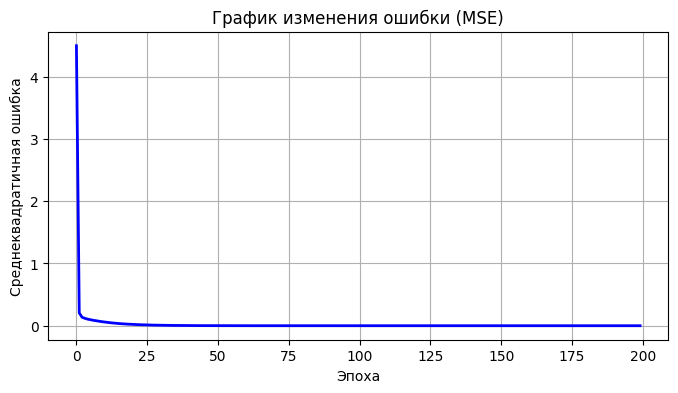

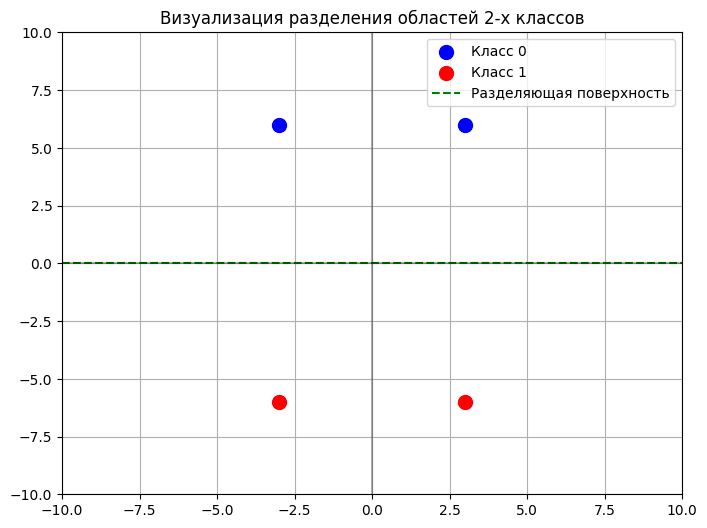


Режим тестирования:
Введите x1, x2 через запятую или 'q' для выхода: 3, 6
Результат: Класс 0 (S = -0.0000)
Введите x1, x2 через запятую или 'q' для выхода: -3, 6
Результат: Класс 0 (S = -0.0000)
Введите x1, x2 через запятую или 'q' для выхода: 3, -6
Результат: Класс 1 (S = 1.0000)
Введите x1, x2 через запятую или 'q' для выхода: -3, -6
Результат: Класс 1 (S = 1.0000)
Введите x1, x2 через запятую или 'q' для выхода: q


In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[3, 6], [-3, 6], [3, -6], [-3, -6]])
e = np.array([0, 0, 1, 1])

# Параметры
learning_rate = 0.01
epochs = 200
np.random.seed(42)

# Инициализация весов и смещения (порога w0)
w = np.random.uniform(-0.5, 0.5, 2)
w0 = np.random.uniform(-0.5, 0.5)

mse_history = []

# ЭТАП 1: ОБУЧЕНИЕ (ADALINE)
for epoch in range(epochs):
    epoch_errors = []
    for i in range(len(X)):
        # Линейный выход сумматора
        S = np.dot(X[i], w) + w0

        # Ошибка (строго линейная)
        delta = e[i] - S

        # Коррекция по дельта-правилу
        w += learning_rate * delta * X[i]
        w0 += learning_rate * delta

        epoch_errors.append(delta ** 2)

    mse_history.append(np.mean(epoch_errors))

# ВИЗУАЛИЗАЦИЯ

# График изменения ошибки
plt.figure(figsize=(8, 4))
plt.plot(mse_history, 'b', linewidth=2)
plt.title("График изменения ошибки (MSE)")
plt.xlabel("Эпоха")
plt.ylabel("Среднеквадратичная ошибка")
plt.grid(True)
plt.show()

# График с визуализацией условия и разделяющей поверхности
plt.figure(figsize=(8, 6))
plt.scatter(X[:2, 0], X[:2, 1], color='blue', s=100, label='Класс 0')
plt.scatter(X[2:, 0], X[2:, 1], color='red', s=100, label='Класс 1')

# Отрисовка разделяющей поверхности
x_line = np.linspace(-10, 10, 100)
y_line = (0.5 - w0 - w[0] * x_line) / w[1]
plt.plot(x_line, y_line, 'g--', label='Разделяющая поверхность')

plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.title("Визуализация разделения областей 2-х классов")
plt.axhline(0, color='black', alpha=0.3)
plt.axvline(0, color='black', alpha=0.3)
plt.legend()
plt.grid(True)
plt.show()

# ЭТАП 2: ФУНКЦИОНИРОВАНИЕ
print("\nРежим тестирования:")
while True:
    user_input = input("Введите x1, x2 через запятую или 'q' для выхода: ")
    if user_input.lower() == 'q': break
    try:
        test_point = np.array([float(c.strip()) for c in user_input.split(',')])
        S_test = np.dot(test_point, w) + w0
        y_final = 1 if S_test >= 0.5 else 0
        print(f"Результат: Класс {y_final} (S = {S_test:.4f})")
    except:
        print("Ошибка ввода")